# A baseline ML models for comparison

## 1. Load the data

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
dataset_path = "../datasets/Edge-IIoT/"

df = pd.read_pickle(dataset_path + "Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.pkl")   

In [3]:
# Show the first 5 rows of the dataset
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [4]:
# Show the different attack labels
print(df['Attack_type'].value_counts())

# Show the shape and size of the dataset
print(f"\nDataframe shape: {df.shape}")

Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
MITM                      1214
Fingerprinting            1001
Name: Attack_type, dtype: int64

Dataframe shape: (157800, 63)


### Data Preparation - Drop data (Columns, duplicated rows, NAN, Null..)

In [5]:
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

df = shuffle(df)

# Compute the number of missing values (NaN or null) in each column of a pandas DataFrame object named df.
df.isna().sum()

arp.opcode                   0
arp.hw.size                  0
icmp.checksum                0
icmp.seq_le                  0
icmp.unused                  0
http.content_length          0
http.request.method          0
http.referer                 0
http.request.version         0
http.response                0
http.tls_port                0
tcp.ack                      0
tcp.ack_raw                  0
tcp.checksum                 0
tcp.connection.fin           0
tcp.connection.rst           0
tcp.connection.syn           0
tcp.connection.synack        0
tcp.flags                    0
tcp.flags.ack                0
tcp.len                      0
tcp.seq                      0
udp.stream                   0
udp.time_delta               0
dns.qry.name                 0
dns.qry.name.len             0
dns.qry.qu                   0
dns.qry.type                 0
dns.retransmission           0
dns.retransmit_request       0
dns.retransmit_request_in    0
mqtt.conack.flags            0
mqtt.con

In [6]:
# Show the shape and size of the dataset
print(f"\nDataframe shape: {df.shape}")

# Show the first 5 rows of the dataset
df.head()


Dataframe shape: (152196, 48)


,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.request.method,http.referer,http.request.version,http.response,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
3029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Ransomware
70872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Port_Scanning
110027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
118800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
131458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_UDP


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152196 entries, 3029 to 13290
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   arp.opcode                 152196 non-null  float64
 1   arp.hw.size                152196 non-null  float64
 2   icmp.checksum              152196 non-null  float64
 3   icmp.seq_le                152196 non-null  float64
 4   icmp.unused                152196 non-null  float64
 5   http.content_length        152196 non-null  float64
 6   http.request.method        152196 non-null  object 
 7   http.referer               152196 non-null  object 
 8   http.request.version       152196 non-null  object 
 9   http.response              152196 non-null  float64
 10  http.tls_port              152196 non-null  float64
 11  tcp.ack                    152196 non-null  float64
 12  tcp.ack_raw                152196 non-null  float64
 13  tcp.checksum               

### Step 4 : Categorical data encoding (Dummy Encoding):

EG. Takes a product category and converts it to a binary vector
```
   customer_id product_category  apparel  books  electronics
0            1     electronics        0      0            1
1            2          apparel       1      0            0
2            3            books       0      1            0
3            4     electronics        0      0            1
4            5          apparel       1      0            0
```



In [8]:
def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

encode_text_dummy(df,"mqtt.topic")

Grab the Attack type and attack label

In [9]:
# Save the attack type and attack label
attack_type = df.pop('Attack_type')
attack_label = df.pop('Attack_label')

In [10]:
print(attack_type.value_counts())
print(attack_label.value_counts())


Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: Attack_type, dtype: int64
1    128095
0     24101
Name: Attack_label, dtype: int64


Scaling of features

In [63]:
# Scaling of features to fit within defined range
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaled_features = StandardScaler().fit_transform(df.values)

# Label Preprocessing
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label_n = le.fit_transform(attack_type.values)

# Reverse map the numerical labels to original labels.
label_orig = le.inverse_transform(label_n)


In [64]:
# Print the mapping of numerical labels to original labels
print("Numerical label mapping:")
for i, label in enumerate(le.classes_):
    print(i, "-->", label)

Numerical label mapping:
0 --> Backdoor
1 --> DDoS_HTTP
2 --> DDoS_ICMP
3 --> DDoS_TCP
4 --> DDoS_UDP
5 --> Fingerprinting
6 --> MITM
7 --> Normal
8 --> Password
9 --> Port_Scanning
10 --> Ransomware
11 --> SQL_injection
12 --> Uploading
13 --> Vulnerability_scanner
14 --> XSS


In [12]:
# Test / train split
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(scaled_features, label_n, stratify=label_n, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, label_n, stratify=label_n, test_size=0.2, random_state=42)
print ("Train:", X_train.shape, y_train.shape)
print ("Test:", X_test.shape, y_test.shape)

Train: (121756, 74) (121756,)
Test: (30440, 74) (30440,)


In [51]:
orig = list(le.inverse_transform(y_train))  
pd.value_counts(orig)

Normal                   19281
DDoS_UDP                 11598
DDoS_ICMP                10477
DDoS_HTTP                 8396
SQL_injection             8225
DDoS_TCP                  8198
Uploading                 8171
Vulnerability_scanner     8050
Password                  7978
Backdoor                  7892
Ransomware                7751
XSS                       7634
Port_Scanning             7137
Fingerprinting             682
MITM                       286
dtype: int64

In [14]:
len(np.unique(y_test))

15

In [15]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(121756, 74)
(30440, 74)
(121756,)
(30440,)


We now have our data in a typical ***X_train, X_test, y_train, y_test*** format, where we can then deploy centralised and decentralised ML models.

## 2. Centralised Machine Learning Models

### 2.1 Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
%%time
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

CPU times: total: 703 ms
Wall time: 732 ms


DecisionTreeClassifier()

In [18]:
dt_score = dTree_clf.score(X_test, y_test)
print("Accuracy of Model::", dt_score)

Accuracy of Model:: 0.9278580814717478


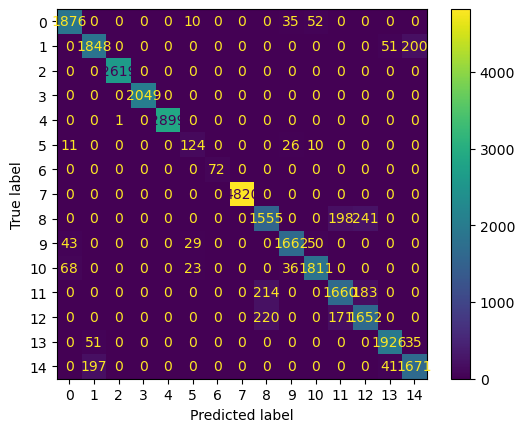

In [19]:
dt_predictions = dTree_clf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt_cm = confusion_matrix(y_test, dt_predictions, labels=dTree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dTree_clf.classes_)
disp.plot()
plt.show()

In [20]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, dt_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, dt_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, dt_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, dt_predictions, average=None, labels=np.unique(y_test)) )

Macro: (0.9066886305165823, 0.9100118951403419, 0.9082555334575476, None)
Micro: (0.9278580814717478, 0.9278580814717478, 0.9278580814717478, None)
Weighted: (0.9280019730964065, 0.9278580814717478, 0.9279107331204198, None)
Per-label: (array([0.93893894, 0.88167939, 0.99961832, 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 0.7817999 , 0.94485503,
       0.94175767, 0.81813701, 0.79576108, 0.95441031, 0.87670514]), array([0.95083629, 0.88041925, 1.        , 1.        , 0.99965517,
       0.7251462 , 1.        , 1.        , 0.77983952, 0.93161435,
       0.93446852, 0.80700049, 0.80861478, 0.95725646, 0.8753274 ]), array([0.94485016, 0.88104887, 0.99980912, 1.        , 0.99982756,
       0.69467787, 1.        , 1.        , 0.78081848, 0.93818798,
       0.93809894, 0.81253059, 0.80213644, 0.95583127, 0.87601573]), array([1973, 2099, 2619, 2049, 2900,  171,   72, 4820, 1994, 1784, 1938,
       2057, 2043, 2012, 1909], dtype=int64))


In [21]:
print(confusion_matrix(y_test, dt_predictions))


[[1876    0    0    0    0   10    0    0    0   35   52    0    0    0
     0]
 [   0 1848    0    0    0    0    0    0    0    0    0    0    0   51
   200]
 [   0    0 2619    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 2049    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    1    0 2899    0    0    0    0    0    0    0    0    0
     0]
 [  11    0    0    0    0  124    0    0    0   26   10    0    0    0
     0]
 [   0    0    0    0    0    0   72    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0 4820    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0 1555    0    0  198  241    0
     0]
 [  43    0    0    0    0   29    0    0    0 1662   50    0    0    0
     0]
 [  68    0    0    0    0   23    0    0    0   36 1811    0    0    0
     0]
 [   0    0    0    0    0    0    0    0  214    0    0 1660  183    0
     0]
 [   0    0    0    0    0    0    0    

In [61]:
print("DT Classification Report")
print(classification_report(y_test, dt_predictions))


DT Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1973
           1       0.88      0.88      0.88      2099
           2       1.00      1.00      1.00      2619
           3       1.00      1.00      1.00      2049
           4       1.00      1.00      1.00      2900
           5       0.67      0.73      0.69       171
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00      4820
           8       0.78      0.78      0.78      1994
           9       0.94      0.93      0.94      1784
          10       0.94      0.93      0.94      1938
          11       0.82      0.81      0.81      2057
          12       0.80      0.81      0.80      2043
          13       0.95      0.96      0.96      2012
          14       0.88      0.88      0.88      1909

    accuracy                           0.93     30440
   macro avg       0.91      0.91      0.91     30440
w

### 2.2 Multi Layer Perception

In [23]:
from sklearn.neural_network import MLPClassifier

In [24]:
%%time
mlp_clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)
mlp_score = mlp_clf.score(X_test, y_test)

CPU times: total: 9min 30s
Wall time: 1min 46s


In [25]:
print("Accuracy of MLP model:", mlp_score)


Accuracy of MLP model: 0.8238173455978975


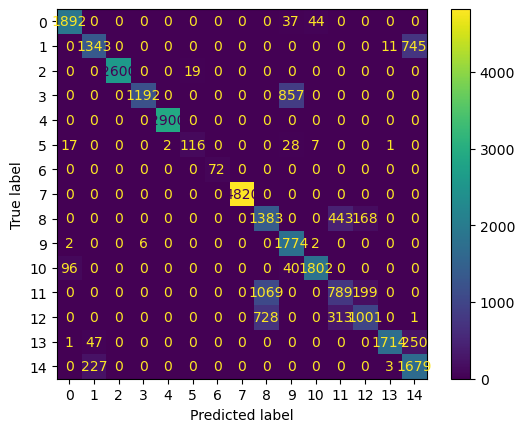

In [26]:
mlp_predictions = mlp_clf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mlp_cm = confusion_matrix(y_test, mlp_predictions, labels=mlp_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=mlp_clf.classes_)
disp.plot()
plt.show()

In [60]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, mlp_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, mlp_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, mlp_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, mlp_predictions, average=None, labels=np.unique(y_test)) )

# print classification report
print("MLP Classification Report: ")
print(classification_report(y_test, mlp_predictions))

Macro: (0.8361641352496915, 0.8049580033253041, 0.8070236247895597, None)
Micro: (0.8238173455978975, 0.8238173455978975, 0.8238173455978975, None)
Weighted: (0.8489394955564277, 0.8238173455978975, 0.823823865273272, None)
Per-label: (array([0.94223108, 0.8305504 , 1.        , 0.99499165, 0.99931082,
       0.85925926, 1.        , 1.        , 0.43490566, 0.64839181,
       0.97142857, 0.51067961, 0.73172515, 0.99132447, 0.62766355]), array([0.95894577, 0.63982849, 0.99274532, 0.58174719, 1.        ,
       0.67836257, 1.        , 1.        , 0.69358074, 0.99439462,
       0.92982456, 0.3835683 , 0.48996574, 0.85188867, 0.87951807]), array([0.95051495, 0.72282024, 0.99635946, 0.7342162 , 0.99965529,
       0.75816993, 1.        , 1.        , 0.53459606, 0.78495575,
       0.95017137, 0.43808995, 0.58692466, 0.91633253, 0.73254799]), array([1973, 2099, 2619, 2049, 2900,  171,   72, 4820, 1994, 1784, 1938,
       2057, 2043, 2012, 1909], dtype=int64))
MLP Classification Report: 
        

In [28]:
print (len(mlp_clf.coefs_))
print (mlp_clf.coefs_[0].shape)
print (mlp_clf.coefs_[1].shape)
print (len(mlp_clf.intercepts_))
print (mlp_clf.intercepts_[0].shape)
print (mlp_clf.intercepts_[1].shape)
print (mlp_clf.n_layers_)
print (type(mlp_clf.coefs_[0]))

2
(74, 100)
(100, 15)
2
(100,)
(15,)
3
<class 'numpy.ndarray'>


### 2.3 Extreme Gradient Boosting

In [29]:
# https://www.geeksforgeeks.org/xgboost/
# https://www.section.io/engineering-education/machine-learning-with-xgboost-and-scikit-learn/

!pip install xgboost
import xgboost as xgb


In [30]:

%%time
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)


CPU times: total: 10min 17s
Wall time: 28.2 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [31]:

#predictions = xgb_classifier.predict(X_test)
#print("Accuracy of XGB Model::",accuracy_score(y_test,predictions))

xgb_score = xgb_classifier.score(X_test, y_test)
print("Accuracy of XGB model:", xgb_score)

# print classification report
xgb_predictions = xgb_classifier.predict(X_test)


Accuracy of XGB model: 0.9507884362680683


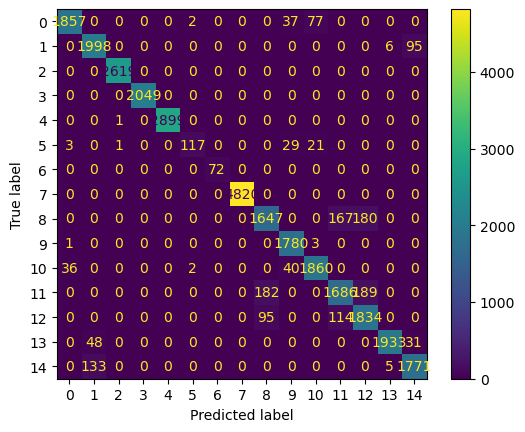

In [32]:
xgb_predictions = xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
xgb_cm = confusion_matrix(y_test, xgb_predictions, labels=xgb_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_classifier.classes_)
disp.plot()
plt.show()


In [62]:

from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, xgb_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, xgb_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, xgb_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, xgb_predictions, average=None, labels=np.unique(y_test)) )

print("XGB Classification Report: ")
print(classification_report(y_test, xgb_predictions))


Macro: (0.9485275724786476, 0.9310818719744531, 0.9379446500111649, None)
Micro: (0.9507884362680683, 0.9507884362680683, 0.9507884362680682, None)
Weighted: (0.9512152303611882, 0.9507884362680683, 0.9506252004756434, None)
Per-label: (array([0.97891407, 0.91693437, 0.99923693, 1.        , 1.        ,
       0.96694215, 1.        , 1.        , 0.85602911, 0.94379639,
       0.94849567, 0.85714286, 0.83250113, 0.99434156, 0.93357934]), array([0.94120628, 0.95188185, 1.        , 1.        , 0.99965517,
       0.68421053, 1.        , 1.        , 0.82597793, 0.99775785,
       0.95975232, 0.81964025, 0.89769946, 0.96073559, 0.92771084]), array([0.95968992, 0.93408135, 0.99961832, 1.        , 0.99982756,
       0.80136986, 1.        , 1.        , 0.84073507, 0.97002725,
       0.95409079, 0.83797217, 0.86387188, 0.97724975, 0.93063584]), array([1973, 2099, 2619, 2049, 2900,  171,   72, 4820, 1994, 1784, 1938,
       2057, 2043, 2012, 1909], dtype=int64))
XGB Classification Report: 
       

### 2.4 KNN

In [34]:
# Perform KNN classification on the data
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)


In [35]:

%%time
# Fit the classifier to the training data
knn.fit(X_train, y_train)

CPU times: total: 31.2 ms
Wall time: 18 ms


KNeighborsClassifier(n_neighbors=7)

In [36]:

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data
knn_predictions = knn.predict(X_test)

# Compute the accuracy of the KNN classifier on the test data
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, knn_predictions))


Accuracy: 0.8105453350854139
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1973
           1       0.72      0.73      0.73      2099
           2       1.00      0.99      1.00      2619
           3       0.75      0.80      0.78      2049
           4       1.00      1.00      1.00      2900
           5       0.76      0.68      0.72       171
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00      4820
           8       0.46      0.51      0.48      1994
           9       0.74      0.73      0.73      1784
          10       0.95      0.95      0.95      1938
          11       0.48      0.50      0.49      2057
          12       0.60      0.51      0.55      2043
          13       0.85      0.85      0.85      2012
          14       0.63      0.62      0.63      1909

    accuracy                           0.81     30440
   macro avg       0.79      0.79      0.79     304

### 2.5 Random Forest

In [37]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


In [38]:

%%time
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

CPU times: total: 12.8 s
Wall time: 12.9 s


RandomForestClassifier(random_state=42)

Accuracy of Random Forest model: 0.9325229960578186


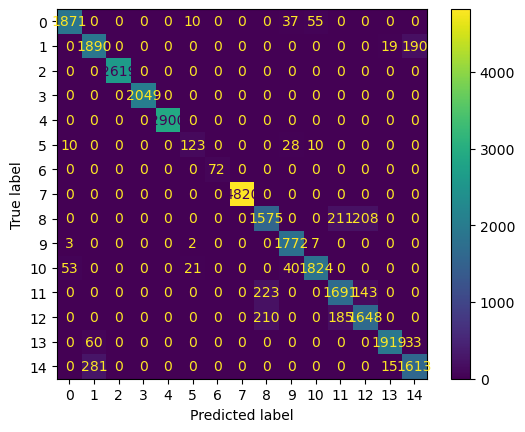

In [39]:
rf_score = rf.score(X_test, y_test)
print("Accuracy of Random Forest model:", rf_score)

rf_predictions = rf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rf_cm = confusion_matrix(y_test, rf_predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf.classes_)
disp.plot()

plt.show()



In [40]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1973
           1       0.85      0.90      0.87      2099
           2       1.00      1.00      1.00      2619
           3       1.00      1.00      1.00      2049
           4       1.00      1.00      1.00      2900
           5       0.79      0.72      0.75       171
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00      4820
           8       0.78      0.79      0.79      1994
           9       0.94      0.99      0.97      1784
          10       0.96      0.94      0.95      1938
          11       0.81      0.82      0.82      2057
          12       0.82      0.81      0.82      2043
          13       0.98      0.95      0.97      2012
          14       0.88      0.84      0.86      1909

    accuracy                           0.93     30440
   macro avg       0.92      0.91      0.92     30440
weighted avg       0.93   

### 2.6 Support Vector machine

In [41]:
from sklearn.svm import SVC

# Create an SVM object
svm = SVC(kernel='linear')

In [42]:

%%time
# Train the SVM on the training data
svm.fit(X_train, y_train)

CPU times: total: 4min 58s
Wall time: 5min 1s


SVC(kernel='linear')

In [43]:
# Predict the labels of the test data
svm_predications = svm.predict(X_test)

# Compute the accuracy of the SVM on the test data
accuracy = accuracy_score(y_test, svm_predications)
print("Accuracy:", accuracy)
print(classification_report(y_test, svm_predications))


Accuracy: 0.777299605781866
              precision    recall  f1-score   support

           0       0.63      0.77      0.70      1973
           1       0.89      0.60      0.71      2099
           2       1.00      0.99      1.00      2619
           3       1.00      0.58      0.73      2049
           4       1.00      1.00      1.00      2900
           5       0.84      0.67      0.74       171
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00      4820
           8       0.62      0.25      0.36      1994
           9       0.64      0.99      0.78      1784
          10       0.70      0.51      0.59      1938
          11       0.41      0.82      0.55      2057
          12       0.69      0.40      0.50      2043
          13       0.95      0.85      0.90      2012
          14       0.62      0.90      0.73      1909

    accuracy                           0.78     30440
   macro avg       0.80      0.76      0.75     3044

In [65]:
# Print the mapping of numerical labels to original labels
print("Numerical label mapping:")
for i, label in enumerate(le.classes_):
    print(i, "-->", label)

Numerical label mapping:
0 --> Backdoor
1 --> DDoS_HTTP
2 --> DDoS_ICMP
3 --> DDoS_TCP
4 --> DDoS_UDP
5 --> Fingerprinting
6 --> MITM
7 --> Normal
8 --> Password
9 --> Port_Scanning
10 --> Ransomware
11 --> SQL_injection
12 --> Uploading
13 --> Vulnerability_scanner
14 --> XSS
